In [3]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=1, last_level=4, header="<font color='blus'>Data access and OOP</font>")

# <font color='blus'> Using `pandas` and dataframes

In [2]:
import pandas as pd

In [3]:
dict_person ={'firstname':['Leon','Paul','Sabrina', 'Lucia']
                , 'last_name':['Smith','John','Edouard', 'Oconor']
                , 'age': [26, 12, 35, 44]} 
df_person = pd.DataFrame(dict_person)
display(df_person)

,firstname,last_name,age
0,Leon,Smith,26
1,Paul,John,12
2,Sabrina,Edouard,35
3,Lucia,Oconor,44


## <font color='blus'> Explore dataframe

> `df_shape` : number of rows and number of columns of dataframe.

In [4]:
df_person.shape

(4, 3)

> `df_columns` : names of dataframe columns

In [5]:
df_person.columns

Index(['firstname', 'last_name', 'age'], dtype='object')

> `df_head` display first `N` rows of dataframe.

In [6]:
df_person.head(3)

,firstname,last_name,age
0,Leon,Smith,26
1,Paul,John,12
2,Sabrina,Edouard,35


> `sample` : display a random sample of the dataframe.

In [7]:
df_person.sample(3)

,firstname,last_name,age
3,Lucia,Oconor,44
1,Paul,John,12
0,Leon,Smith,26


## <font color='blus'> Loop over dataframes

In [8]:
df_person

,firstname,last_name,age
0,Leon,Smith,26
1,Paul,John,12
2,Sabrina,Edouard,35
3,Lucia,Oconor,44


### <font color='blus'> Dataframes indexes

In [9]:
for index in df_person.index :
    # Access to the dataframe row indexed with index value
    row = df_person.loc[index]
    print(row)
    print("----")


firstname     Leon
last_name    Smith
age             26
Name: 0, dtype: object
----
firstname    Paul
last_name    John
age            12
Name: 1, dtype: object
----
firstname    Sabrina
last_name    Edouard
age               35
Name: 2, dtype: object
----
firstname     Lucia
last_name    Oconor
age              44
Name: 3, dtype: object
----


> A row in a dataframe is a `Series` object
>
> `Series` are a kind of dataframe with a single column
>
> A dataframe are compound series sharing the same index 

In [10]:
index = 2
type(df_person.loc[index])

pandas.core.series.Series

### <font color='blus'> Dataframes columns

In [11]:
for column_name in df_person.columns :
    # Access to the dataframe row indexed with index value
    column_content = df_person[column_name]
    print(column_name)
    print(column_content)
    print('-----')


firstname
0       Leon
1       Paul
2    Sabrina
3      Lucia
Name: firstname, dtype: object
-----
last_name
0      Smith
1       John
2    Edouard
3     Oconor
Name: last_name, dtype: object
-----
age
0    26
1    12
2    35
3    44
Name: age, dtype: int64
-----


In [12]:
column_name = 'last_name'
type(df_person[column_name])

pandas.core.series.Series

## <font color='blus'> Reading CSV files

### <font color='blus'> Explore CSV files

>file:///home/bangui/Dataforcast/Projets/Missions/EML/Img/csv_covid19.png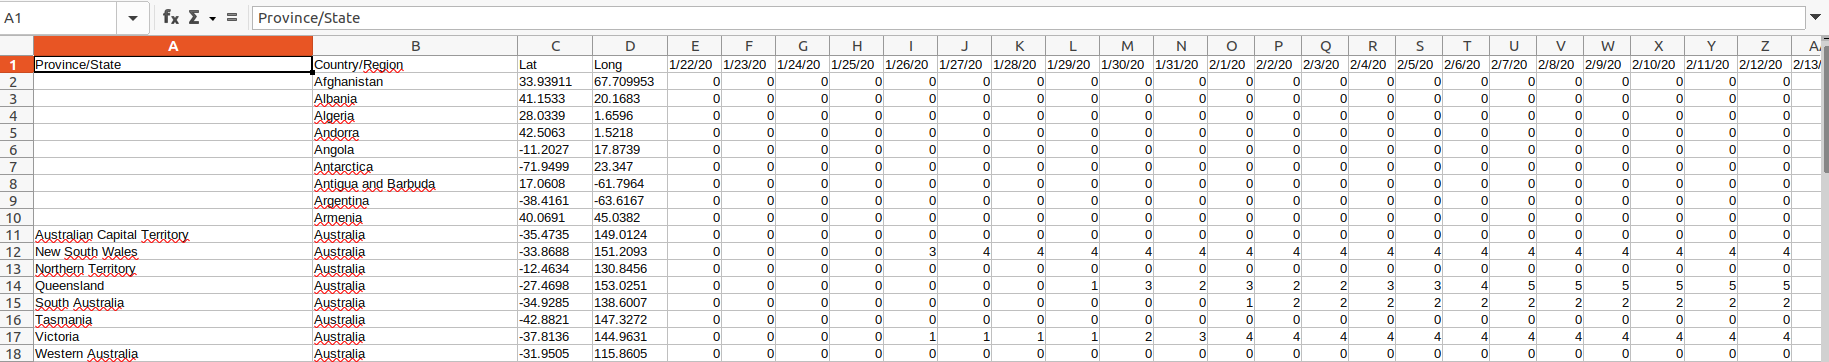

> Picture above shows that there is an header for this file, meaning, the firts row is dedicated for columns description.
>
> Also, you may need to edit a csv file with a text editor to identify separator character.

### <font color='blus'> Store CSV file content in a pandas dataframe

In [13]:
df_covid = pd.io.parsers.read_csv("time_series_covid19_confirmed_global.csv", header=0)

In [14]:
df_covid = pd.read_csv("time_series_covid19_confirmed_global.csv", header=0)

### <font color='blus'> Explore pandas dataframe

In [15]:
df_covid.shape

(289, 979)

In [16]:
df_covid.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/13/22', '9/14/22', '9/15/22', '9/16/22', '9/17/22', '9/18/22',
       '9/19/22', '9/20/22', '9/21/22', '9/22/22'],
      dtype='object', length=979)

> Exploration allows a first data interpretation.
>
> It show here that columns after `Long` are dates. It can be concluded that this dataframe is composed from **time series**

In [17]:
df_covid['Province/State'].head(15)

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
5                              NaN
6                              NaN
7                              NaN
8                              NaN
9     Australian Capital Territory
10                 New South Wales
11              Northern Territory
12                      Queensland
13                 South Australia
14                        Tasmania
Name: Province/State, dtype: object

In [18]:
location = 'South Australia'
filter_location = df_covid['Province/State']==location
df_area = df_covid[filter_location]
df_area

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22,9/21/22,9/22/22
13,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,758840,758840,758840,762643,762643,762643,762643,762643,762643,765857


In [19]:
start_date = '1/22/20'

In [20]:
df_area.loc[13]

Province/State    South Australia
Country/Region          Australia
Lat                      -34.9285
Long                     138.6007
1/22/20                         0
                       ...       
9/18/22                    762643
9/19/22                    762643
9/20/22                    762643
9/21/22                    762643
9/22/22                    765857
Name: 13, Length: 979, dtype: object

In [21]:
df_area.iloc[0]

Province/State    South Australia
Country/Region          Australia
Lat                      -34.9285
Long                     138.6007
1/22/20                         0
                       ...       
9/18/22                    762643
9/19/22                    762643
9/20/22                    762643
9/21/22                    762643
9/22/22                    765857
Name: 13, Length: 979, dtype: object

In [22]:
start_date = '1/22/20'
df_area.iloc[0][start_date:]

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
9/18/22    762643
9/19/22    762643
9/20/22    762643
9/21/22    762643
9/22/22    765857
Name: 13, Length: 975, dtype: object

In [23]:
list_date = [date for date in df_area.iloc[0][start_date:].index]
list_date[:10]

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20']

In [24]:
type(df_area.iloc[0][start_date:])

pandas.core.series.Series

In [25]:
list_x = [i for i in range(len(df_area.iloc[0][start_date:]))]
list_y = df_area.iloc[0][start_date:].values

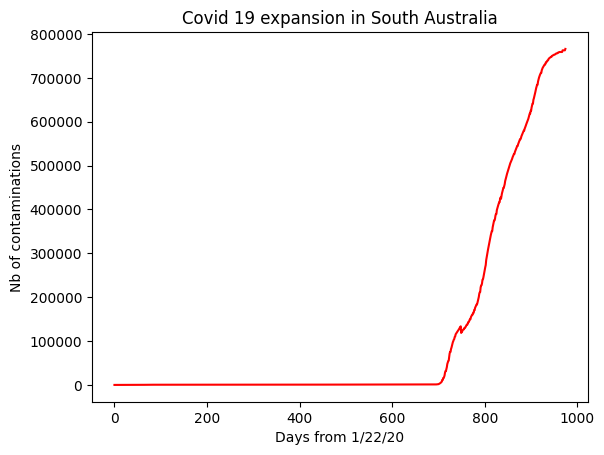

In [26]:
#%matplotlib notebook
from matplotlib import pyplot as plt

# draw a curve; years on the x-axis, GDP (GDP) on the y-axis
plt.plot(list_x, list_y, color='red', linestyle='solid')
# ajoute un titre
plt.title("Covid 19 expansion in "+location)
# ajoute une étiquette sur l'axe des y
plt.xlabel("Days from "+start_date)
plt.ylabel("Nb of contaminations")
plt.show()

> let's put all that in a function

In [27]:
def line_plot(list_x, list_y, location, start_date, y_label):
    # draw a curve; years on the x-axis, GDP (GDP) on the y-axis
    plt.plot(list_x, list_y, color='red', linestyle='solid')
    # ajoute un titre
    plt.title("Covid 19 expansion in "+location)
    # ajoute une étiquette sur l'axe des y
    plt.xlabel("Days from "+start_date)
    plt.ylabel(y_label)
    plt.show()

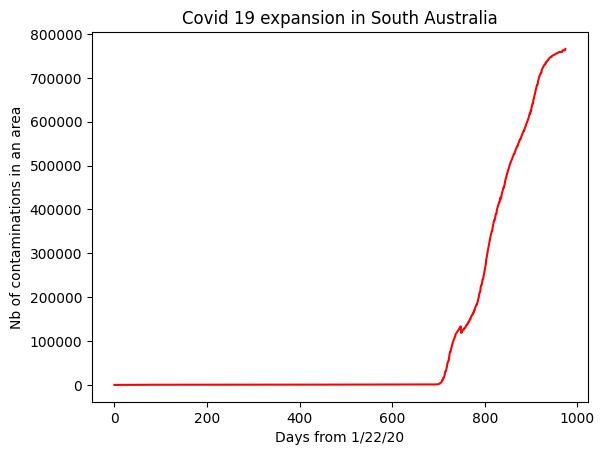

In [28]:
y_label = "Nb of contaminations in an area"
line_plot(list_x, list_y, location, start_date,y_label)

In [29]:
from matplotlib import pyplot as plt
def plot_line(list_x, list_y, title="No title", xlabel="No xlabel", ylabel="No ylabel", color='green', linestyle='solid'):

    plt.plot(list_x, list_y, color=color, linestyle='solid')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

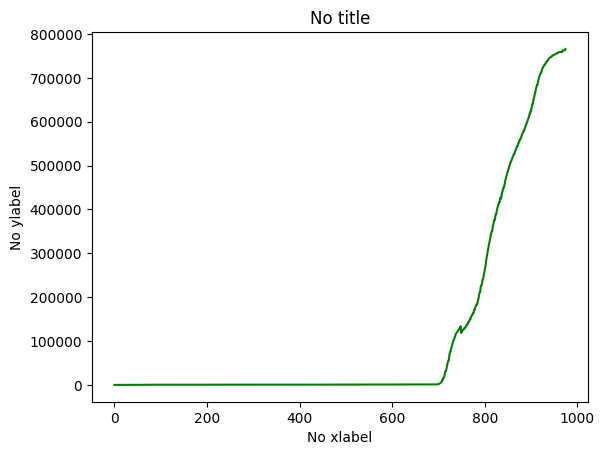

In [30]:
list_x = [i for i in range(len(df_area.iloc[0][start_date:]))]
list_y = df_area.iloc[0][start_date:].values
plot_line(list_x, list_y)

> With **kwarg

In [31]:
from matplotlib import pyplot as plt
def plot_line(list_x,list_y,  **kwargs):
    
    title = kwargs['title']
    xlabel = kwargs['xlabel']
    ylabel = kwargs['ylabel']
    color = kwargs['color']
    linestyle = kwargs['linestyle']
    
    plt.plot(list_x, list_y, color=color, linestyle=linestyle)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    

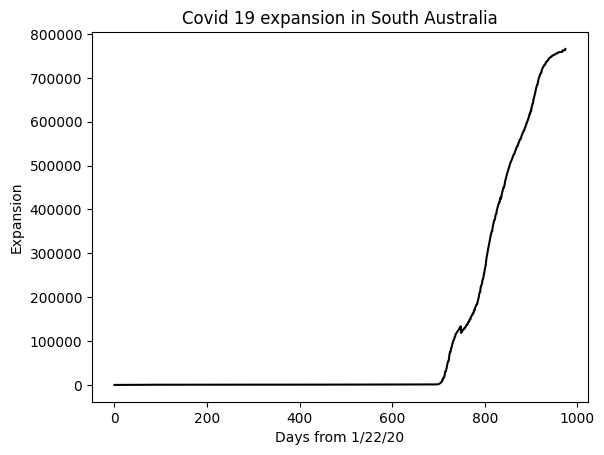

In [32]:
dict_arg = {'title':"Covid 19 expansion in "+location
            , 'xlabel':"Days from "+start_date
            , 'ylabel':"Expansion"
            , 'color':'black'
            , 'linestyle':'solid'
           }
list_x = [i for i in range(len(df_area.iloc[0][start_date:]))]
list_y = df_area.iloc[0][start_date:].values
plot_line(list_x, list_y, **dict_arg)

# <font color='blus'> Data access from files

## <font color='blus'> Flat files with `pandas`

> `pandas` is a Python package dedicated to data processing.
>
> This is an intelligent tool for reading files in a sense it contains classes that are able to interpret contents in a file.

## <font color='blus'> Structured files

## <font color='blus'> Binary files

> `pip install scikit-image`
>
> or
>
> `python -m pip install -U scikit-image` 

> Binary files are called **unstructured** files. This is a sequence of bits.
>
> There is no metadata to structure the file, means, extra-information to break down blocs into file. PNG file here under is explained on 
> - `https://en.wikipedia.org/wiki/Portable_Network_Graphics`
>
> Information like each pixel is represented with 3 fields and each one of the field is sized to 32 bits is out of the file.
>
> `Scipy` (contraction of Scientific Python) has developped algorithms for image processing. We use one of them here-under. Let's have an example with a `PNG` formated file.

# <font color='blus'>Object Oriented Programming

> Object Oriented Programming allows to modelize things of the real world. We will see how.
>
> An object is a generic term to identify an entity, a thing or a concept of the real world. An object is a key element of a business domain.
>
> For example, an employee is a key element of a human resources service, as well as book is a key element for a book saler. Ignoring such entity does not make sense for the domain we describe while designing a human resources application.
>
>
> OOP consists of identifying these entities and implementing their behavior.
>
> For example in the quote "a cat is a mammal which belongs to the feline species".
>
> Three entities are identifiable: cat, mammal and feline.

> The pillars of object programming are:
>
>> - Abstraction
>>
>> - Encapsulation
>>
>> - Inheritance
>>
>> - Polymorphism

## <font color='blus'>Encapsulation and Objects

> Encapsulation is hidding the details of an object's behavior and state.
>
> The state of an object is represented by all the values of its attributes.

> These entities are encoded in classes. Classes are categories.
>
> An instance of a class, is a representative of this class, an object.

In [33]:
class Cat() :
    '''Model of a cat.
    '''
    def __init__(self) :
        pass

> This is the minimal syntax to define a class

> `__init__` is named a special method. A special method allows a class to have a specific behaviour.
>
> This special method allows to create an **instance** of the class `Cat`. `oCat` is an instance of `Cat` class in the same way you, me, are instances of human beings class.
>
> `self` is interpreted as myself. `self` is **always** the first argument of any methods, as we will see later.
>
> We're going to see later how to implement special methods for classes.
>
> Then `oClass` is an object, an instance, of type `Class`.
>
> Applying `dir` to any Python element leads to display this special method, `__init__`.
>
> **In Python, all is object**. Even a class, such as `Cat` is an object.


In [34]:
'__init__' in dir(Cat)

True

In [35]:
oCat = Cat()#__init__ special method is invoked here
type(oCat)

__main__.Cat

### <font color='blus'>Object properties

> Properties are what characterizes an object, a cat in the example above. 
>
>**Any object is characterized with properties values.**
>
> Properties values is what defines the object state. 
>
> For the cat example, properties may be :
> - identifier
> - weight
> - gender
>
> In the example below, a cat, with a given name, a weight and gender is created.
>
> Object intialization with properties values takes place with arguments of `__init__` special method.

In [36]:
class Cat() :
    '''Model of a cat.
    Cat properties are provided as arguments of initialization method.
    These properties characterize a cat and may be updated.
    '''
    def __init__(self, name='Minou', weight=5.2, speakout='miaouuu', gender='female') :
        self._identifier = name
        self._weight     = weight
        self._gender     = gender


In [37]:
oCat = Cat()
print(oCat._identifier)
print(oCat._weight)
print(oCat._gender)

Minou
5.2
female


In [38]:
oCat1 = Cat(gender='male')
print(oCat1._identifier)
print(oCat1._weight)
print(oCat1._gender)

Minou
5.2
male


In [39]:
dir(oCat)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_gender',
 '_identifier',
 '_weight']

> Note the use of the punct character, `.`, to access properties through the `oCat` instance.
>
> This is the same while loading a module from a Python package such as : `import matplotlob.pyplot as plt`
>
> `pyplot` module is a property of `matplotlib` package.
>
> In Python, all is object, including packages....

### <font color='blus'>Object methods

> Methods are what define object **behavior**. Most often, they are verbs.
>
> A cat meows, eat, sleep and hunts.
>
> Let's see how we can implement `eat` behavior. We suppose a cat appreciate mouses but not bees.
>> For doing so, we're goint to create both, the `Mouse` class and the `Bee` class.
>> - these classes will contain identifiers, such as `Mouse` and `Bee`
>> - when eating one this animals, a cat is able to recognize a mosue from a bee.
>
> Let's implement the cat behavior we've described

In [40]:
class Cat() :
    '''Model of a cat.
    The cat is suppose to appreciate eating mouses but is afraid of bees. 
    '''
    # Initialization if an instance with default properties values.
    def __init__(self, name='Minou', weight=5.2, speakout='miaouuu', gender='female') :
        self._identifier = name
        self._weight     = weight
        self._gender     = gender
        
    # A cat eats some animals. Animals, in this implementation, may be a bee or a mouse.
    def eat(self, oAnimal) :
        if oAnimal is None :
            print("Nothing to eat! An hungry cat is an angry cat.\n")            
        elif 'bee' == oAnimal._category :
            print("I do not appreciate {}\n".format(oAnimal._category))
        elif 'mouse' == oAnimal._category :
            print("I'am eating a {}\n".format(oAnimal._category))
        else :
            print("Unkown kind of eat! I'am still hungry!\n".format(oAnimal._category))
            

In [41]:
class Mouse():
    '''Implement a mouse'''
    def __init__(self) :
        self._category = 'mouse'
        self._weight     = 0.2
        
class Bee():
    '''Implement a bee'''
    def __init__(self) :
        self._category = 'bees'        
class Animal():
    '''Use for test purpose'''
    def __init__(self) :
        self._category = 'animal'                

> Let's test it

In [42]:
oCat = Cat()
_=[oCat.eat(animal) for animal in [None, Animal(), Bee(), Mouse()]]

Nothing to eat! An hungry cat is an angry cat.

Unkown kind of eat! I'am still hungry!

Unkown kind of eat! I'am still hungry!

I'am eating a mouse



> Note the semantic that raises with this example : 
>> - oCat.eat(oAnimal)
>> - Subject --> Verb --> Object
>
> OOP respect natural language expressions such as french or english.

### <font color='blus'> `isinstance` for checking the type of an object

> There is a way to identify which class an obaject belongs to.

In [43]:
isinstance(oCat, Cat)

True

In [44]:
isinstance(oCat, Mouse)

False

> The property `_category` is no more needed. Let's implement new classes.

In [45]:
class Mouse():
    '''Implement a mouse'''
    def __init__(self) :
        self._weight     = 0.2
        
class Bee():
    '''Implement a bee'''
    def __init__(self) :
        self._weight     = 0.02
class Animal():
    '''Use for test purpose'''
    def __init__(self) :
        pass

In [46]:
class Cat() :
    '''Model of a cat.
    The cat is suppose to appreciate eating mouses but is afraid of bees. 
    '''
    # Initialization if an instance with default properties values.
    def __init__(self, name='Minou', weight=5.2, speakout='miaouuu', gender='female') :
        self._identifier = name
        self._weight     = weight
        self._gender     = gender
        
    # A cat eats some animals. Animals, in this implementation, may be a bee or a mouse.
    def eat(self, oAnimal) :
        if oAnimal is None :
            print("Nothing to eat! An hungry cat is an angry cat.\n")        
        elif isinstance(oAnimal, Bee) :
            print("I do not appreciate {}\n".format(type(oAnimal)))
        elif isinstance(oAnimal, Mouse) :
            print("I'am eating a {}\n".format(type(oAnimal)))
            self._weight += oAnimal._weight
        else :
            print("Unkown kind of eat: {}! I'am still hungry!\n".format(type(oAnimal)))
            

In [47]:
oCat = Cat()
_=[oCat.eat(animal) for animal in [None, Animal(), Bee(), Mouse()]]

Nothing to eat! An hungry cat is an angry cat.

Unkown kind of eat: <class '__main__.Animal'>! I'am still hungry!

I do not appreciate <class '__main__.Bee'>

I'am eating a <class '__main__.Mouse'>



## <font color='blus'> Encapsulation

> Encapsulation takes place with properties and methods attached to objects.
>
> The way we've accessed properties violate encapsulation rules. Properties may not be accessed directly.

### <font color='blus'>Object assessors

> To encapsulate is not to make the properties of an object directly accessible.
>
> To do this, we use assessors to access the properties of the object. They are named **getters** and **setters**
>
> Access to a property triggers the call to the corresponding function (method).
>
> - **getters** are methods to retrieve objects properties values.
> - **setters** are methods that modify object properties values.
>
> Using assessors is **strongly recommanded**. it is fully compliant with encapsulation principle.
>
> On the example below, while assigning cat weight, we want to forbid that a cat weight exceeds 15Kg.
>
> This require for us to implement methods that will update properties.
>

> Let's create a cat with default properties values

In [48]:
class Cat() :
    '''Model of a cat.
    The cat is suppose to appreciate eating mouses but is afraid of bees. 
    '''
    # Initialization if an instance with default properties values.
    def __init__(self, name='Minou', weight=5.2, speakout='miaouuu', gender='female') :
        self._identifier = name
        self._weight     = weight
        self._gender     = gender
        self._maxweight  = 15.0
        self._minweight  = 2.0
        
    # A cat eats some animals. Animals, in this implementation, may be a bee or a mouse.
    def eat(self, oAnimal) :
        if oAnimal is None :
            print("Nothing to eat! An hungry cat is an angry cat.\n")        
        elif isinstance(oAnimal, Bee) :
            print("I do not appreciate {}\n".format(type(oAnimal)))
        elif isinstance(oAnimal, Mouse) :
            print("I'am eating a {}\n".format(type(oAnimal)))
            self._weight += oAnimal._weight
        else :
            print("Unkown kind of eat: {}! I'am still hungry!\n".format(type(oAnimal)))
        
    def getWeight(self): 
        return self._weight
    
    def setWeight(self, weight): 
        if self._minweight <= weight <= self._maxweight :
            self._weight = weight
        else :
            print("*** WARNING: maximum weight value for a cat is {}Kg".format(self._maxweight))


In [49]:
oCat = Cat()

In [50]:
oCat._weight

5.2

In [51]:
oCat.getWeight()

5.2

In [52]:
oCat.setWeight(3.3)
oCat.getWeight()

3.3

In [53]:
oCat.setWeight(20.2)

*** WARNING: maximum weight value for a cat is 15.0Kg


In [54]:
oCat.setWeight(-1)

*** WARNING: maximum weight value for a cat is 15.0Kg


### <font color='blus'>Exercise

> Write a cat class with defaut values with `getWeight` and `setWeight` assessors.
>
> `getWeitgh` method returns a dictionary srtuctured as following 
>> - {'default' : weight_value} when weight is the default value, meaning, the value when object has been instantiated.
>> - {'updated' : weight_value} when weight is different from the default value.

In [55]:
class Cat() :
    '''Model of a cat.
    The cat is suppose to appreciate eating mouses but is afraid of bees. 
    '''
    # Initialization if an instance with default properties values.
    def __init__(self, name='Minou', weight=5.2, speakout='miaouuu', gender='female') :
        self._identifier = name
        self._weight     = weight
        self._gender     = gender
        self._maxweight  = 15.0
        self._minweight  = 2.0
        self._defaultWeight = 5.2
        
    # A cat eats some animals. Animals, in this implementation, may be a bee or a mouse.
    def eat(self, oAnimal) :
        if oAnimal is None :
            print("Nothing to eat! An hungry cat is an angry cat.\n")        
        elif isinstance(oAnimal, Bee) :
            print("I do not appreciate {}\n".format(type(oAnimal)))
        elif isinstance(oAnimal, Mouse) :
            print("I'am eating a {}\n".format(type(oAnimal)))
            self._weight += oAnimal._weight
        else :
            print("Unkown kind of eat: {}! I'am still hungry!\n".format(type(oAnimal)))
        
    def getWeight(self): 
        if self._defaultWeight == self._weight:
            return {'default':self._defaultWeight}
        else :
            return {'updated':self._weight}
            
    
    def setWeight(self, weight): 
        if self._minweight <= weight <= self._maxweight :
            self._weight = weight
        else :
            print("*** WARNING: maximum weight value for a cat is {}Kg".format(self._maxweight))


In [56]:
oCat = Cat()

In [57]:
oCat.getWeight()

{'default': 5.2}

In [58]:
oCat.setWeight(5.2)

oCat.getWeight()

{'default': 5.2}

In [59]:
oCat.setWeight(3.3)
oCat.getWeight()

{'updated': 3.3}

In [60]:
oCat.setWeight(-1)

*** WARNING: maximum weight value for a cat is 15.0Kg


### <font color='blus'>Assessors with `property` builtin function

> This is a way to set or get a property without to call the matched method, only using properties name.
>
> This is a way to override properties access mechanism. 

In [61]:
class Cat() :
    '''Model of a cat.
    The cat is suppose to appreciate eating mouses but is afraid of bees. 
    '''
    def __init__(self, name='Minou', weight=5.2, speakout='miaouuu', gender='female') :
        self._identifier = name
        self._weight     = weight
        self._gender     = gender
        self._maxweight  = 15.0
        self._minweight  = 2.0
        
    # A cat eats some animals. Animals, in this implementation, may be a bee or a mouse.
    def eat(self, oAnimal) :
        if oAnimal is None :
            print("Nothing to eat! An hungry cat is an angry cat.\n")        
        elif isinstance(oAnimal, Bee) :
            print("I do not appreciate {}\n".format(type(oAnimal)))
        elif isinstance(oAnimal, Mouse) :
            print("I'am eating a {}\n".format(type(oAnimal)))
            self._weight += oAnimal._weight
        else :
            print("Unkown kind of eat: {}! I'am still hungry!\n".format(type(oAnimal)))
        
    def getWeight(self): 
        return self._weight
    
    
    def setWeight(self, weight): 
        if self._minweight <= weight <= self._maxweight :
            self._weight = weight
        else :
            print("*** WARNING: maximum weight value for a cat is {}Kg".format(self._maxweight))
    
    # Define properties over getWeight
    weight = property(getWeight, setWeight, "I'm the 'getWeight' property.")

In [62]:
oCat = Cat()
oCat.weight

5.2

In [63]:
oCat.weight = 6.5
print(oCat.weight)

6.5


In [64]:
oCat.weight = 30
print(oCat.weight)

*** WARNING: maximum weight value for a cat is 15.0Kg
6.5


> Please note the `self._weight` property rather then `self.weight`.
>
> This is due to the fact that using self.weight will fall in an infinite loop ineight such way :
>> - self.weight calls
>>> - self.weight calls
>>>> - self.weight ...
>
> 

## <font color='blus'>Abstraction

> Abstraction consists of simplifying the representation of a real object.
>
> Modeling means adopting a simplified representation of the real world. The modeling depends on our point of view on the object, in other words, depends on the context.
>
> For example, a human resources application will focus on retaining only what is essential to its operation. An employee is a human being, with:
> * a social security number
> * his gender
> * civil attributes (place and date of birth, residence).
>
> We will not retain its size, its weight, its medicals constants, which are useless attributes for our business case, describe a human being as an employee. 
>
> For a medical application, we will retain other aspects of the human being such as his medical constants.

In [65]:
class Employee() :
    def __init__(self) :
        print("---> Initialisation de l'objet 'Employee'")

In [66]:
oEmployee = Employee()

---> Initialisation de l'objet 'Employee'


### <font color='blus'>Properties

> These are values assigned to an object
>
> For example, for a employee recorded in public registers, his social security number and his name.

In [67]:
class Employee() :
    def __init__(self, sn:str, name:str) -> None:
        print("---> Initialisation de l'objet 'Employee'")
        self._sn = sn
        self._name = name

In [68]:
oEmployee = Employee('1234Q897', 'John Smith')

---> Initialisation de l'objet 'Employee'


### <font color='blus'> Methods

> A method implements a **behaviour** of an object.
>
> For example an employee is working on a project.
>
> To illustrate this, we will assign the employee a datascience project.

In [69]:
class Employee() :
    def __init__(self, sn:str, name:str) -> None:
        print("---> Initialisation de l'objet 'Employee'")
        self._sn = sn
        self._name = name
    def work(self) :
        return "I work on a Computer vision project"

In [70]:
oEmployee2 = Employee('123TB897', 'John Elton')
oEmployee2.work()

---> Initialisation de l'objet 'Employee'


'I work on a Computer vision project'

## <font color='blus'>Specials methods

> Special methods are used to encapsulate the behavior of an object.
>
> `__init__` is one such method. By convention, special methods start and end with the character sequence `__`.
>
> For example, we want `print(oCar)` to return the characteristics of a car. We will use the special method `__str__`.

In [71]:
print(Employee('a','b'))

---> Initialisation de l'objet 'Employee'


In [72]:
class Vehicle() :
    def __init__(self, name:str, wheel:int) ->None :
        self._name = name
        self._wheel = wheel
    def __str__(self) :
        '''Special method that prints all properties (attributes) values assigned to an object.'''
        str_attr1 =  "Vehicle name is `{}` ".format(self._name) 
        str_attr2 =  "with a number of wheels = {}\n".format(self._wheel)
        return str_attr1 + str_attr2
    

In [73]:
oVehicle = Vehicle('bicycle',2)
print(oVehicle)

Vehicle name is `bicycle` with a number of wheels = 2



In [74]:
print(oCat)

> We could defile the operation `+` between two objects. It consists of merging all properties of 2 Vehicles. 
>
> Special method related to `+` is `__add__`

In [75]:
class Vehicle() :
    def __init__(self, name:str, wheel:int) ->None :
        self._name = name
        self._wheel = wheel
    def __str__(self) :
        '''Special method that prints all properties (attributes) values assigned to an object.'''
        str_attr1 =  "Name   = {}\n".format(self._name) 
        str_attr2 =  "Wheels = {}".format(self._wheel)
        return str_attr1 + str_attr2
    
    def __add__(self, oVehicle:Vehicle) -> Vehicle :
        '''Returns a new object of type Vehicle which have all properties added.'''
        name = oVehicle._name
        wheel = oVehicle._wheel
        
        addedName = self._name + '+' + name
        addedWheel = self._wheel + wheel
        return Vehicle(addedName, addedWheel)

In [76]:
oVehicle1 = Vehicle('Bycycle', 2)
oVehicle2 = Vehicle('Unicycle', 1)
oVehicle3 = oVehicle1 + oVehicle2
print(oVehicle3)

Name   = Bycycle+Unicycle
Wheels = 3


> For an exhaustive list of special methods:
> - https://nbhosting.inria.fr/builds/python-slides/handouts/latest/6-2-dunder-specials.html    

## <font color='blus'>Exercice : modeling cats population increase

> A **male cat** and **female cat** meet and generate some kittens
>
> - The number of kittens is a random integer value included between 1 and 5
> - Each kitten weight is a random float value between 0.3Kg and 0.6 Kg 
>
> Let's implement it !
>
*Help : np_randint = np.random.randint(10, 30, 4)*


*mu, sigma = 0, 0.1 # mean and standard deviation *

*s = np.random.normal(mu, sigma, 1000)*

In [77]:
import numpy as np
mu, sigma = 0.5, 0.2 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [78]:
s.min(), s.max()

(-0.21316950198449636, 1.0854619302691457)

In [79]:
s[s>0.]

array([0.52776437, 0.66473787, 0.24714162, 0.5191242 , 0.66295114,
       0.48250441, 0.49596736, 0.48794247, 0.61306188, 0.61513376,
       0.69876394, 0.52224583, 0.7114447 , 0.26027677, 0.33482172,
       0.59626525, 0.66670911, 0.44652642, 0.31920693, 0.40053852,
       0.63966855, 0.35630077, 0.72901623, 0.61955411, 0.73669892,
       0.48546763, 0.40623133, 0.61749399, 0.43598481, 0.64468608,
       0.50726273, 0.76898062, 0.42444013, 0.26709342, 0.42819431,
       0.55487716, 0.39115984, 0.8209442 , 0.18555303, 0.79823229,
       0.41710211, 0.66109132, 0.81542307, 0.13247283, 0.22754206,
       0.30962834, 0.19720089, 0.5268391 , 0.64877715, 0.07932057,
       0.43433327, 0.62262384, 0.39686424, 0.49421985, 0.57026568,
       0.40828852, 0.27509204, 0.44081288, 0.75536317, 0.48487311,
       0.50593804, 0.30109781, 0.04323569, 0.282988  , 0.37088257,
       0.32305112, 0.67286757, 0.21793847, 0.32300804, 0.68171167,
       0.57258917, 0.73957694, 0.2586087 , 0.45354604, 0.41344

In [80]:
import random 
class Cat() :
    '''Model of a cat.
    The cat is suppose to appreciate eating mouses but is afraid of bees. 
    '''
    def __init__(self, name='Minou', weight=5.2, speakout='miaouuu', gender='female') :
        self._identifier = name
        self._weight     = weight
        self._gender     = gender
        self._maxweight  = 15.0
        self._minweight  = 2.0
        
    # A cat eats some animals. Animals, in this implementation, may be a bee or a mouse.
    def eat(self, oAnimal) :
        if oAnimal is None :
            print("Nothing to eat! An hungry cat is an angry cat.\n")        
        elif isinstance(oAnimal, Bee) :
            print("I do not appreciate {}\n".format(type(oAnimal)))
        elif isinstance(oAnimal, Mouse) :
            print("I'am eating a {}\n".format(type(oAnimal)))
            self._weight += oAnimal._weight
        else :
            print("Unkown kind of eat: {}! I'am still hungry!\n".format(type(oAnimal)))
        
    def getWeight(self): 
        return self._weight
    def __str__(self) :
        return self._identifier
    
    def setWeight(self, weight): 
        if self._minweight <= weight <= self._maxweight :
            self._weight = weight
        else :
            print("*** WARNING: maximum weight value for a cat is {}Kg".format(self._maxweight))
    def __add__(self, oCat) :
        nb_kitten = random.randint(0,10)
        list_oCat = list()
        if self._gender != oCat._gender :
            list_oCat = [Cat(name="Kitten#"+str(idx+1)) for idx,cat in enumerate(range(nb_kitten))]
        return list_oCat
        
    # Define properties over getWeight
    weight = property(getWeight, setWeight, "I'm the 'getWeight' property.")

In [81]:
oCatMale   = Cat(gender='male')
oCatFemale = Cat(gender='female')

In [82]:
for oCatKitten in oCatMale+oCatFemale :
    print(oCatKitten)

Kitten#1
Kitten#2
Kitten#3
Kitten#4
Kitten#5
Kitten#6


In [83]:
oCatMale   = Cat(gender='female')
oCatFemale = Cat(gender='female')

In [84]:
for oCatKitten in oCatMale+oCatFemale :
    print(oCatKitten)

In [85]:
try :
    list_kitten = oCatMale + oCatFemale
except Exception as exception :
    print("*** ERROR : {}".format(exception))

## <font color='blus'>The inheritance

> Inheritnce allows iplementation of classes taxonomies.
>
> For the sake of the example, a car inherites the properties of a vehicle.
>
> La classe `Vehicle` est une généralisation de la classe `Car` et de façon symétrique, la classe `Car` est une spécialisation de la classe `Vehicle`.
>
> Pour l'exemple, on considère des véhicles à roues.

In [86]:
class Vehicle() :
    def __init__(self, name:str, wheel:int) ->None :
        self._name = name
        self._wheel = wheel

# Car inherites from Vehicle
class Car(Vehicle) :
    def __init__(self, name:str, registration:str, wheel=4) :
        super().__init__(name, wheel)
        self._registration = registration


In [87]:
oCar = Car('4x4', '298 OT 53', 4)
oCar._name, oCar._wheel, oCar._registration

('4x4', 4, '298 OT 53')

> De la même façon on peut créer un objet Truck avec 6 roues

In [88]:
oTruck = Car('Truck', 6, '3455 GT 54')
oTruck._name, oTruck._wheel, oTruck._registration

('Truck', '3455 GT 54', 6)

> Les objets `oTruck` et `oCar` **héritent** des attribus de Vehicle, à savoir, `name` et `wheel`.

> En language UML, on modèlise les classes comme suit :

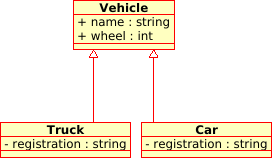

> L'héritage concerne aussi les méthodes, les comportements des objets.

In [89]:
class Vehicle() :
    def __init__(self, name:str, wheel:int) ->None :
        self._name = name
        self._wheel = wheel
    def fuelLevel(self) :
        '''Computes the level of fuel in the tank and returns a percentage'''
        return 0.5
        

# Car inherites from Vehicle
class Car(Vehicle) :
    def __init__(self, name:str, registration:str, wheel=4) :
        super().__init__(name, wheel)
        self._registration = registration

In [90]:
oCar = Car('Ford', 4)
oCar.fuelLevel()

0.5

> The `oCar` object has **inherited** the `fuelLevel` method, defined in `Vehicle`.

## <font color='blus'>`property()` method

> This is a way to avoid a call for getter and setter results

In [91]:
class Vehicle() :
    def __init__(self, name:str, wheel:int) ->None :
        self._name = name
        self._wheel = wheel
        self._fuelLevel = 0
    def get_fuelLevel(self) :
        '''Computes the level of fuel in the tank and returns a percentage'''
        return self._fuelLevel
    def set_fuelLevel(self, fuel) :
        '''Computes the level of fuel in the tank and returns a percentage'''
        self._fuelLevel = fuel

        
# Car inherites from Vehicle
class Car(Vehicle) :
    def __init__(self, name:str, registration:str, wheel=4) :
        super().__init__(name, wheel)
        self._registration = registration
    def get_fuelLevel(self) :
        return super().get_fuelLevel()
    def set_fuelLevel(self, fuelLevel) :
        super().set_fuelLevel(fuelLevel)
        
    fuelLevel = property(fget=get_fuelLevel, fset=set_fuelLevel, doc="Fuel level property")


In [92]:
oCar = Car('Tessla', 4)
oCar.get_fuelLevel()

0

In [93]:
oCar.set_fuelLevel(6)

In [94]:
oCar.fuelLevel

6

In [95]:
oCar.fuelLevel = 3
oCar.fuelLevel

3

## <font color='blus'>Exercice (15mn)

> Create an `Animal` class from which cats and dogs inherit.
>
> Find an attribute of class `Animal` that cats and dogs inherit.
>
> Implement the behavior of an animal which consists of a dog **barking** and a cat **meowing**.

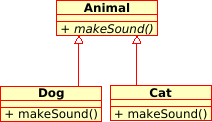

## <font color='blus'>Polymorphism

> The polymorphism mechanism consists in detecting the subclass of an object and activating the method of this object.

In [96]:
class Animal() :
    def __init__(self) :
        pass
    def makeSound(self) :
        return "To be implemented!"
    
class Dog(Animal) :
    def __init__(self) :
        super().__init__()
    def makeSound(self) :
        return "Ouaf!"
    
class Cat(Animal) :
    def __init__(self) :
        super().__init__()
    def makeSound(self) :
        return "Miaou!"

In [97]:
animal = Animal()
animal.makeSound()

'To be implemented!'

In [98]:
oDog = Dog()
print(oDog.makeSound())

Ouaf!


In [99]:
oDog = Dog()
oCat = Cat()
print(oDog.makeSound())
print(oCat.makeSound())

Ouaf!
Miaou!


In [100]:
list_animal = [oCat, oDog]
for animal in list_animal :
    print(animal.makeSound())

Miaou!
Ouaf!


> Pour mettre en évidence le polymorphisme, on utilise un objet de type `defaultdict` que l'on initialise avec la classe (le type) `Animal`.
>
> `ddict_animal` ne connait pas les classes concrètes des objets `Dog` et `Cat` mais cependant. Le mécanisme de polymorphisme va permettre d'activer la méthode idoine de chacun des objets dans `ddict_animal`.

In [101]:
from collections import defaultdict
ddict_animal = defaultdict(Animal) # defaultdict ne connait pas les sous classes Dog et Cat.
ddict_animal['dog'] = oDog
ddict_animal['cat'] = oCat
for key, obj in ddict_animal.items() :
    print(obj.makeSound())

Ouaf!
Miaou!


## <font color='blus'>Exercice 1

> Create a `Vehicle` class from which bicycles and motorcycles inherit
>
> Find at least one attribute of the `Vehicle` class from which bicycles and motorcycles inherit.
>
> Implement the behavior of a vehicle which consists in returning the model of energy consumption, namely, `human` or `fossil`.
>
> Highlight the polymorphic character of this construction using the `defaultdict` object.

## <font color='blus'>Exercice 2

> Write a class `MyGenerator` that implements a generator that returns the string sequences `10,20` when typing print(MyGenerator())

In [102]:
class MyGenerator() :
    def __init__(self) :
        """Generator is fine"""
        pass
    def gen1(self) :
        # Returns 10 at the 1st call
        yield 10
        #Returns 20 at the 2nd call
        yield 20
        
    def __str__(self) :
        str_value = ''
        
        for value in self.gen1() :
            str_value += str(value)+','
        
        return str_value[:-1]
        


In [103]:
print(MyGenerator())

10,20


## <font color='blus'>Exercice 3

> Implement a new cat class behaviour with following tastes when they eat: 
> - some cat appreciate mouses only, 
> - some others appreciate both mouses and bees.
>   
> Create instances of cats that randomly have one of the two tastes.   

## <font color='blus'>Exercice 4

> Write a class, TextReader, that opens and load a text file with following specifications
> - oTextReader.getFileContent(fileName :str) -> list
> - len(oTextReader) returns the number of bytes from the fileName
> - oTextReader1 + oTextReader2 that merge the content of the 2 files and dump it into a new file named fileName1__add__fileName2.txt, with :
>> - fileName1.txt is the name of the file read by oTextReader1 object
>> - fileName2.txt is the name of the file read by oTextReader2 object


# <font color='blus'> Numpy arrays

## <font color='blus'> multi-dimensional arrays

### <font color='blus'> 1-D array : vector

In [104]:
import numpy as np
np_array = np.array([1,2,3])
np_array.shape

(3,)

 `[1,2,3]` --> *3 scalars $\implies$ 1 vector*

### <font color='blus'> 2-D array : matrix

In [105]:
import numpy as np
np_array = np.array([[1,2,3],[4,5,6]])
print(np_array.shape)
display(np_array)

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

> `[`
>> `[1,2,3]` --> *3 scalars $\implies$ 1 vector*
>>
>> `[4,5,6]` --> *3 scalars $\implies$ 1 vector*
>>
>`]` --> *2 vectors $\implies$ 1 matrix*


### <font color='blus'> 3-D array : tensor

In [106]:
np_array = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

In [107]:
print(np_array.shape)
display(np_array)

(2, 2, 3)


array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

> Blocs 
>
>`[`
>>
>> `[`
>>> `[1,2,3]` --> *3 scalars $\implies$ 1 vector*
>>>
>>> `[4,5,6]`
>>>
>>`]` --> *2 vectors $\implies$ 1 matrix*
>>
>> `[`
>>> `[7,8,9]` --> *3 scalars $\implies$ 1 vector*
>>>
>>> `[10,11,12]`
>>>
>>`]` --> *2 vectors $\implies$ 1 matrix*
>
>`]` --> *2 matrix $\implies$ 1 tensor*

### <font color='blus'> Access to elements into multi-dimensional array

> Blocs 
>
>`[`
>>
>> `[`  tensor row0 $\implies$ matrix 0
>>> `[1,2,3]`  *matrix row0 $\implies$ vector 0*
>>>
>>> `[4,5,6]` *matrix row1 $\implies$ vector 1*
>>>
>>`]` 
>>
>> `[` tensor row1$\implies$ matrix 1
>>> `[7,8,9]` *matrix 0 $\implies$ vector 0*
>>>
>>> `[10,11,12]` *matrix 1$\implies$ vector 1*
>>>
>>`]` 
>
>`]`

> Access tensor row 1 $\implies$ matrix 0

In [108]:
np_array = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
np_array[0]

array([[1, 2, 3],
       [4, 5, 6]])

> Access tensor row 1 $\implies$ matrix 1

In [109]:
np_array[1]

array([[ 7,  8,  9],
       [10, 11, 12]])

> Access vector from one of the matrix from the tensor

In [110]:
np_array[1,1]

array([10, 11, 12])

> Access scalaire from a vector inside matrix that is inside a tensor

In [111]:
np_array[1,1,2]

12

### <font color='blus'> Traversing an array

In [112]:
for im, matrix in enumerate(np_array) :
    print("\nMatrix#({},) = {}".format(im, matrix))
    for iv, vector in enumerate(matrix) : 
        print("\nVector#({},{})= {}".format(im, iv, vector))
        for js, scalar in enumerate(vector) :
            print("\nscalar#({},{},{}) = {}".format(im, iv, js, scalar))


Matrix#(0,) = [[1 2 3]
 [4 5 6]]

Vector#(0,0)= [1 2 3]

scalar#(0,0,0) = 1

scalar#(0,0,1) = 2

scalar#(0,0,2) = 3

Vector#(0,1)= [4 5 6]

scalar#(0,1,0) = 4

scalar#(0,1,1) = 5

scalar#(0,1,2) = 6

Matrix#(1,) = [[ 7  8  9]
 [10 11 12]]

Vector#(1,0)= [7 8 9]

scalar#(1,0,0) = 7

scalar#(1,0,1) = 8

scalar#(1,0,2) = 9

Vector#(1,1)= [10 11 12]

scalar#(1,1,0) = 10

scalar#(1,1,1) = 11

scalar#(1,1,2) = 12


### <font color='blus'> Access array elements from a filter

> Create filter : this is a numpy array of booleans

In [113]:
b_filter = np_array > 3
display(b_filter)

array([[[False, False, False],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True]]])

> Apply filter : only values matching with `True` will be kept. Result is a flat array.

In [114]:
display(np_array[b_filter])

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12])

### <font color='blus'> Random number generation with `numpy`

#### <font color='blus'> Generate a random vector of integer numbers

In [115]:
np_randint = np.random.randint(10, 30, 4)
np_randint

array([17, 23, 27, 23])

#### <font color='blus'> Generate a random vector of float numbers

In [116]:
np_rand = np.random.ranf(3)
np_rand

array([0.2858453 , 0.88075691, 0.90179491])